In [9]:
from osgeo import gdal
import numpy as np
import pandas as pd
import glob
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
path_Eow = r'C:\Projects\Pr\3492.10\BruinKeijman\tif\Eow//*.tif'
path_Emk = r'C:\Projects\Pr\3492.10\BruinKeijman\tif\Emakkink//*.tif'
E_ow = glob.glob(path_Eow)
E_makkink = glob.glob(path_Emk)

In [3]:
# load water mask or in fact load land and outer-sea mask
file_landgebruik = r'D:\Projects\Pr\3492.10\Landgebruik//Landgebruik.tif'
#file_water       = r'D:\Projects\Pr\3492.10\Water//Water_100x100m.tif'
array_water      = gdal.Open(file_landgebruik).ReadAsArray()
water = np.ma.masked_not_equal(array_water, 12000)
df = pd.DataFrame(columns=['Emakkink','Eow'])

In [4]:
for idx,item in enumerate(E_makkink):
    datum = item[-12:-4]
    date = datetime.strptime(datum, '%Y%m%d')
    #path_out = os.path.join(folder_out_mow, datum+'.png')
    
    file_E_makkink = item 
    file_E_ow = E_ow[E_ow.index(r'C:\Projects\Pr\3492.10\BruinKeijman\tif\Eow\Eow_'+item[-12::])]
    
    print (idx, file_E_makkink,file_E_ow)
    
    array_E_makkink = gdal.Open(file_E_makkink).ReadAsArray()
    array_E_makkink = np.ma.masked_array(array_E_makkink, water.mask)
    df['Emakkink'][date] = array_E_makkink.compressed().mean()              
    
    array_E_ow = gdal.Open(file_E_ow).ReadAsArray()
    array_E_ow = np.ma.masked_array(array_E_ow, water.mask)
    df['Eow'][date] = array_E_ow.compressed().mean()    

0 C:\Projects\Pr\3492.10\BruinKeijman\tif\Emakkink\Emakkink_20160402.tif C:\Projects\Pr\3492.10\BruinKeijman\tif\Eow\Eow_20160402.tif
1 C:\Projects\Pr\3492.10\BruinKeijman\tif\Emakkink\Emakkink_20160403.tif C:\Projects\Pr\3492.10\BruinKeijman\tif\Eow\Eow_20160403.tif
2 C:\Projects\Pr\3492.10\BruinKeijman\tif\Emakkink\Emakkink_20160404.tif C:\Projects\Pr\3492.10\BruinKeijman\tif\Eow\Eow_20160404.tif
3 C:\Projects\Pr\3492.10\BruinKeijman\tif\Emakkink\Emakkink_20160405.tif C:\Projects\Pr\3492.10\BruinKeijman\tif\Eow\Eow_20160405.tif
4 C:\Projects\Pr\3492.10\BruinKeijman\tif\Emakkink\Emakkink_20160406.tif C:\Projects\Pr\3492.10\BruinKeijman\tif\Eow\Eow_20160406.tif
5 C:\Projects\Pr\3492.10\BruinKeijman\tif\Emakkink\Emakkink_20160407.tif C:\Projects\Pr\3492.10\BruinKeijman\tif\Eow\Eow_20160407.tif
6 C:\Projects\Pr\3492.10\BruinKeijman\tif\Emakkink\Emakkink_20160408.tif C:\Projects\Pr\3492.10\BruinKeijman\tif\Eow\Eow_20160408.tif
7 C:\Projects\Pr\3492.10\BruinKeijman\tif\Emakkink\Emakkink_20

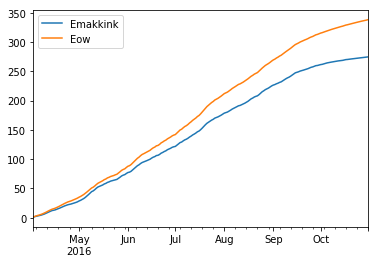

In [15]:
df['Emakkink'].cumsum().plot(legend=True)
df['Eow'].cumsum().plot(legend=True)
plt.show()

In [21]:
cumsum_Emakkink = df['Emakkink'].cumsum()[-1]
cumsum_Eow = df['Eow'].cumsum()[-1]
print (cumsum_Emakkink, cumsum_Eow)

274.480978668 338.079407036


In [23]:
(100 * cumsum_Eow) / cumsum_Emakkink

123.17043194659962

In [24]:
cumsum_Eow - cumsum_Emakkink

63.59842836856842

In [25]:
import seaborn as sns; sns.set(color_codes=True)

In [27]:
g = sns.lmplot(x=df['Emakkink'], y=df['Eow'])

TypeError: lmplot() missing 1 required positional argument: 'data'